# Libraries

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scipy
import random

# Exercise 5.1

In [98]:
Jc = 0.5*np.log(1+np.sqrt(2))
abs_m = lambda J: (1-1/np.sinh(4*J)**4)**(1/8)*(J > Jc)
ϵ = lambda J: -J*1/np.tanh(2*J)*(1+2/np.pi*(2*np.tanh(2*J)**2-1)*scipy.ellipk(4/np.cosh(2*J)**2*np.tanh(2*J)**2))
for J in [4,1,0.5,1/3]:
    m = abs_m(J)
    eps = ϵ(J)
    print(f"J = {J}:|m| = {m}, ϵ = {eps}")

J = 4:|m| = 1.0, ϵ = -7.999999999999594
J = 1:|m| = 0.9999997746272086, ϵ = -1.9971602041122514
J = 0.5:|m| = 0.9992757519570612, ϵ = -0.8727822876562767
J = 0.3333333333333333:|m| = 0.0, ϵ = -0.27243653083414004


The function are correcly implemented.

/tmp/ipykernel_9099/3474193726.py:2: RuntimeWarning: invalid value encountered in power
  abs_m = lambda J: (1-1/np.sinh(4*J)**4)**(1/8)*(J > Jc)


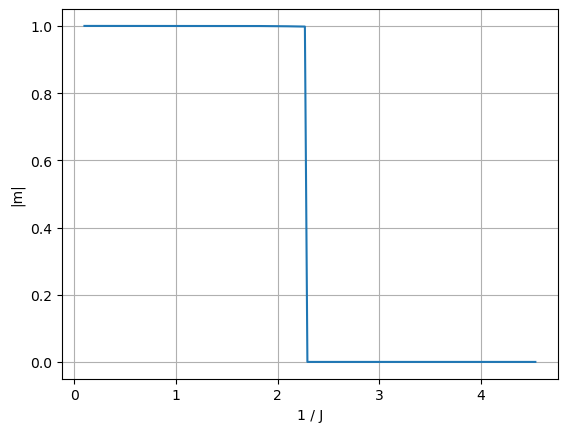

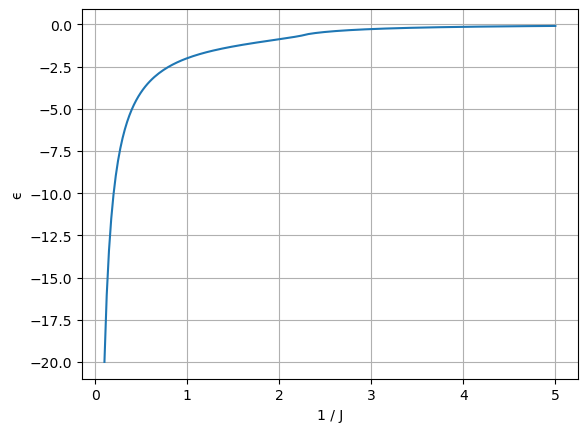

In [101]:
inverse_J = np.linspace(0.1,5,200)
ms = abs_m(1/inverse_J)
ϵs = ϵ(1/inverse_J)

plt.plot(inverse_J,ms)
plt.xlabel("1 / J")
plt.ylabel("|m|")
plt.grid()
plt.show()

plt.plot(inverse_J,ϵs)
plt.xlabel("1 / J")
plt.ylabel("ϵ")
plt.grid()
plt.show()
    

# Exercise 5.2

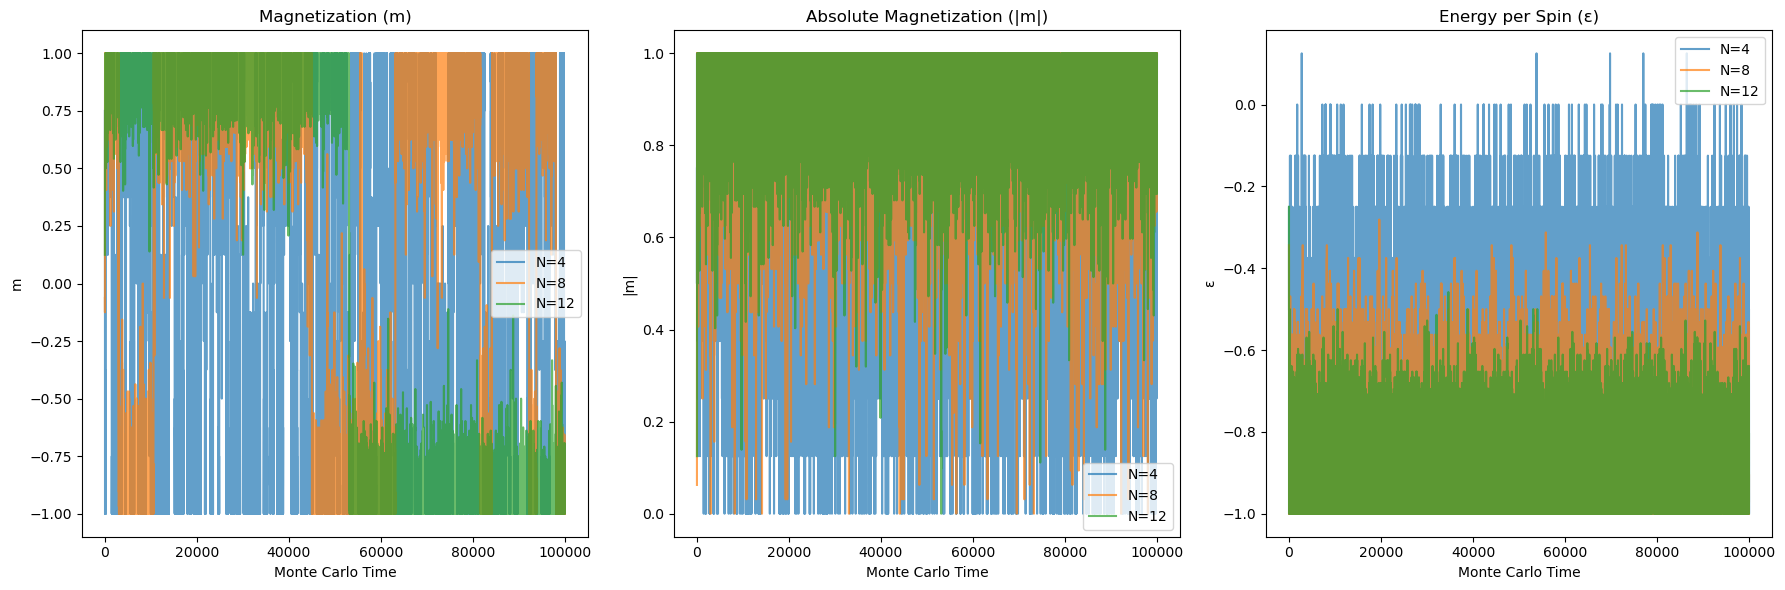

In [5]:
def metropolis_ising(spins, J, h, beta, L, steps):
    N = L * L  # Total number of spins
    m_history = []
    abs_m_history = []
    epsilon_history = []

    for _ in range(steps):
        for _ in range(N):  # Attempt to flip each spin once (on average)
            x = random.randint(0, N - 1)
            ΔH = delta_H(spins, J, h, x, L)
            if ΔH <= 0 or random.random() < np.exp(-beta * ΔH):
                spins[x] *= -1

        # Measure magnetization and energy
        m = np.sum(spins) / N
        abs_m = abs(m)
        epsilon = compute_energy(spins, J, h, L) / N

        # Store values
        m_history.append(m)
        abs_m_history.append(abs_m)
        epsilon_history.append(epsilon)

    return m_history, abs_m_history, epsilon_history


def delta_H(spins, J, h, x, L):
    i, j = x // L, x % L
    s = spins[x]
    right = i * L + (j + 1) % L
    left = i * L + (j - 1) % L
    up = ((i - 1) % L) * L + j
    down = ((i + 1) % L) * L + j
    neighbor_interactions = spins[right] + spins[left] + spins[up] + spins[down]
    return 2 * J * s * neighbor_interactions + 2 * h * s


def compute_energy(spins, J, h, L):
    N = L * L
    energy = 0
    for x in range(N):
        i, j = x // L, x % L
        right = i * L + (j + 1) % L
        down = ((i + 1) % L) * L + j
        energy -= J * spins[x] * (spins[right] + spins[down])
        energy -= h * spins[x]
    return energy


# Parameters
J = 0.5
h = 0.0
beta = 1.0  # Inverse temperature
steps = 10**5
Ns = [4, 8, 12]

# Generate data
histories = {}
for N in Ns:
    L = N
    spins = np.random.choice([-1, 1], size=(L * L))
    m_hist, abs_m_hist, epsilon_hist = metropolis_ising(spins, J, h, beta, L, steps)
    histories[N] = (m_hist, abs_m_hist, epsilon_hist)

# Plotting
time = np.arange(steps)

plt.figure(figsize=(18, 6))

# Plot magnetization m
plt.subplot(1, 3, 1)
for N in Ns:
    plt.plot(time, histories[N][0], label=f'N={N}',alpha=0.7)
plt.title('Magnetization (m)')
plt.xlabel('Monte Carlo Time')
plt.ylabel('m')
plt.legend()

# Plot absolute magnetization |m|
plt.subplot(1, 3, 2)
for N in Ns:
    plt.plot(time, histories[N][1], label=f'N={N}',alpha=0.7)
plt.title('Absolute Magnetization (|m|)')
plt.xlabel('Monte Carlo Time')
plt.ylabel('|m|')
plt.legend()

# Plot energy per spin ε
plt.subplot(1, 3, 3)
for N in Ns:
    plt.plot(time, histories[N][2], label=f'N={N}',alpha=0.7)
plt.title('Energy per Spin (ε)')
plt.xlabel('Monte Carlo Time')
plt.ylabel('ε')
plt.legend()

plt.tight_layout()
plt.show()


Magnetization $m$:
* In the Monte Carlo histories, we observe $m$ fluctuating around zero over time. For larger $Ν$, the fluctuations are smaller, and
$m$ stays closer to zero due to averaging over a larger number of spins.
*This matches the theoretical prediction that
$\langle m \rangle=0$ for finite $N$, even in the broken phase.

Absolute magnetization $|m|$:
* For $J>J_{c}$, $∣m∣$ is large on average, indicating the system is in an ordered phase where most spins are aligned. The magnitude of $∣m∣$ tends to increase with $N$, as the system becomes more strongly ordered in the broken phase.
*This is consistent with the expectation of spontaneous symmetry breaking for $J>J_{c}$, even though $\langle m \rangle=0$ due to finite-size effects.

Energy per spin $\epsilon$
* The energy per spin
$\epsilon$ stabilizes quickly to a lower value for larger $N$, reflecting the increased alignment of spins (lower-energy configurations). For smaller $N$, the fluctuations in $\epsilon$ are larger due to the system's smaller size and more significant thermal fluctuations.

According to the plots we created, $m$ fluctuates symmetrically around zero, $|m|$ stabilizes at larger values for $J>J_{c}$, reflecting alignment in the broken phase and $\epsilon$ converges to a lower value as the system stabilizes, indicating the dominance of ordered states with lower energy.

# Exercise 5.3

In [6]:
def autocorrelation_time(data):
    n = len(data)
    mean = np.mean(data)
    variance = np.var(data)
    C = []

    # Compute autocorrelation function
    for lag in range(n):
        cov = np.mean((data[:n - lag] - mean) * (data[lag:] - mean))
        C.append(cov / variance)

    # Normalize C to get Γ
    Gamma = np.array(C) / C[0]

    # Find cutoff T where Γ crosses zero
    T = next((t for t, gamma in enumerate(Gamma) if gamma < 0), len(Gamma))

    # Compute integrated autocorrelation time
    tau = 0.5 + np.sum(Gamma[1:T])
    return tau


# Example Usage
if __name__ == "__main__":
    # Assume histories for m, |m|, and ε are computed for N=8
    J = 0.5
    h = 0.0
    beta = 1.0
    steps = 10**5
    L = 8  # Test for N=8

    # Generate data
    spins = np.random.choice([-1, 1], size=(L * L))
    m_hist, abs_m_hist, epsilon_hist = metropolis_ising(spins, J, h, beta, L, steps)

    # Compute autocorrelation times
    tau_m = autocorrelation_time(histories[8][0])
    tau_abs_m = autocorrelation_time(histories[8][1])
    tau_epsilon = autocorrelation_time(histories[8][2])

    print("Autocorrelation times:")
    print(f"τ_m = {tau_m}")
    print(f"τ_|m| = {tau_abs_m}")
    print(f"τ_ε = {tau_epsilon}")


Autocorrelation times:
τ_m = 2886.459928811145
τ_|m| = 6.411312195742923
τ_ε = 3.7826121533170847


The very slow autocorrelation time of
m is not important because, for
$h=0$, the $\mathbb{Z}_{2}$ symmetry ensures that
$\langle m \rangle$ in any finite system, regardless of the sampling dynamicsSince $m$ fluctuates symmetrically around zero, meaningful physical observables like $|m|$ or $\epsilon$, which directly reflect the system's ordering or energy, are unaffected by the slow autocorrelation of
$m$.

In [ ]:
def autocorrelation_time(data,max_lag=None):
    n= len(data)
    if max_lag == None:
        max_lag= n
    mean = np.mean(data)
    variance = np.var(data)
    C = []

    # Compute autocorrelation function
    for lag in range(max_lag):
        cov = np.mean((data[:n - lag] - mean) * (data[lag:] - mean))
        C.append(cov/variance)

    # Normalize C to get Γ
    Gamma = np.array(C) / C[0]

    # Find cutoff T where Γ crosses zero
    T = next((t for t, gamma in enumerate(Gamma) if gamma < 0), len(Gamma))

    # Compute integrated autocorrelation time
    tau = 0.5 + np.sum(Gamma[1:T])
    return tau


#  Compute autocorrelation times for |m| and ε 
auto_times = {}
for N in Ns:
    auto_times[N] = (autocorrelation_time(histories[N][1],100),autocorrelation_time(histories[N][2],100))


# Exercise 5.4

In [ ]:
def bootstrap_analysis(data,auto_time,B):
    n = len(data)
    data = data[int(5*auto_time):] # account for thermalization
    data = data[:n:int(auto_time)] # decimating
    iid_length = len(data)

    exp_values = []
    for b in range(B):
            bootstrap_sample = []
            for i in range(iid_length):
                index = np.random.randint(0,iid_length)
                bootstrap_sample.append(data[index])
            exp_values.append(np.mean(bootstrap_sample))

    return exp_values

B = 1000
bootstrap = {}
for N in Ns:
     auto_time = max(auto_times[N])
     bootstrap[N] = (bootstrap_analysis(histories[N][1],auto_time,B), bootstrap_analysis(histories[N][2],auto_time,B))
     print(f"N = {N}: |m|: {np.mean(bootstrap[N][0])} \u00B1 {np.std(bootstrap[N][0])}")
     print(f"N = {N}: ϵ: {np.mean(bootstrap[N][1])} \u00B1{np.std(bootstrap[N][0])}")
     




N = 4: <|m|>: 0.918346459075089 ± 0.0006969074498442606
N = 4 <ϵ>: -0.8764708089970795 ±0.0006969074498442606
N = 8: <|m|>: 0.9122353822830708 ± 0.0007168230851023661
N = 8 <ϵ>: -0.8729871921105277 ±0.0007168230851023661
N = 12: <|m|>: 0.9114963151927439 ± 0.000632205875186031
N = 12 <ϵ>: -0.8729168511849185 ±0.000632205875186031


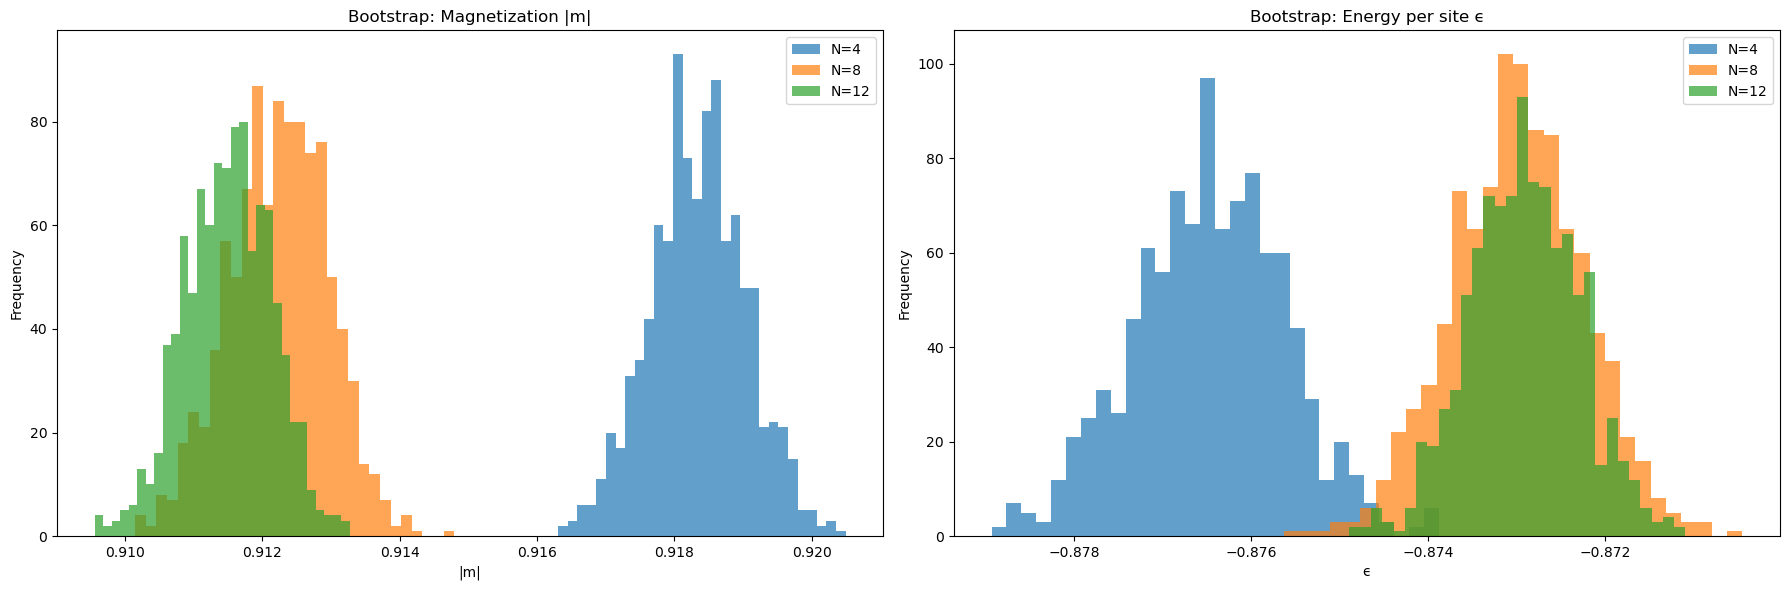

In [ ]:
plt.figure(figsize=(18, 6))

# Plot magnetization |m|
plt.subplot(1, 2, 1)
for N in Ns:
    plt.hist(bootstrap[N][0], label=f'N={N}',alpha=0.7,bins=30)
plt.title('Bootstrap: Magnetization |m|')
plt.xlabel("|m|")
plt.ylabel('Frequency')
plt.legend()

# Plot absolute magnetization ϵ
plt.subplot(1, 2, 2)
for N in Ns:
    plt.hist(bootstrap[N][1], label=f'N={N}',alpha=0.7,bins=30)
plt.title('Bootstrap: Energy per site ')
plt.xlabel("ϵ")
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

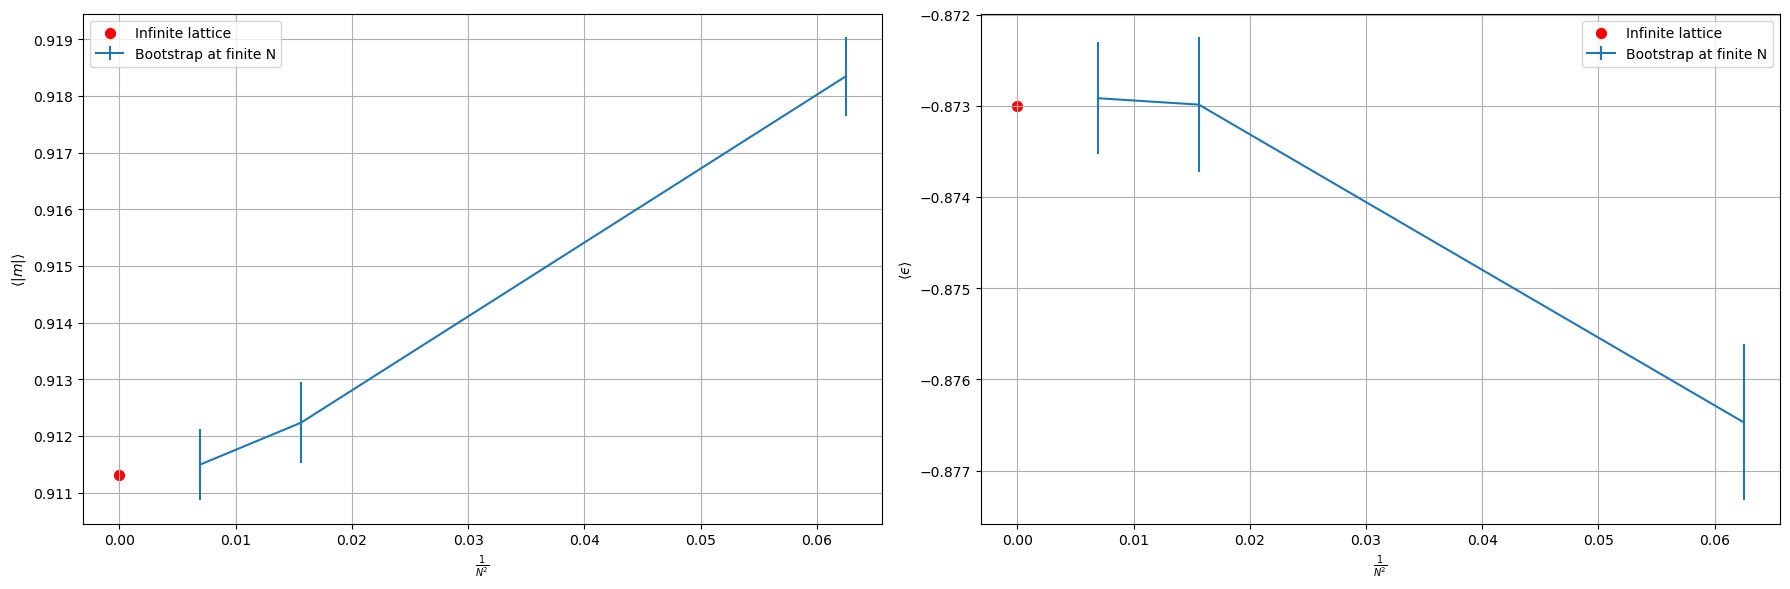

In [94]:
ym = []
ym_err = []
yϵ = []
yϵ_err= []
for N in Ns:
    ym.append(np.mean(bootstrap[N][0]))
    ym_err.append(np.std(bootstrap[N][0]))
    yϵ.append(np.mean(bootstrap[N][1]))
    yϵ_err.append(np.std(bootstrap[N][1]))

x = 1/np.array(Ns)**2
m_inf = 0.9113194
ϵ_inf = -0.873
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.errorbar(x,ym,ym_err,label="Bootstrap at finite N")
plt.scatter([0],[m_inf],color="red",label="Infinite lattice",s=50)
plt.xlabel(r"$\frac{1}{N^2}$")
plt.ylabel(r"$\langle |m| \rangle $")
plt.grid()
plt.legend(loc=2)

plt.subplot(1, 2, 2)
plt.errorbar(x,yϵ,yϵ_err,label="Bootstrap at finite N")
plt.scatter([0],[ϵ_inf],color="red",label="Infinite lattice",s=50)
plt.xlabel(r"$\frac{1}{N^2}$")
plt.ylabel(r"$\langle ϵ \rangle $")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

With growing lattice sizes (here on the x-axis towards 0) the expectation values for the absolute magnetisations and the energy per site go towards the analytical values for infinite systems. It can be expected that with more simulations in bigger systems this behaviour continues. The standard deviation does not seem to change with system size for |m|; from the right plot one might think that the standard deviation grows with smaller systems for |ϵ|. More samples would clarify this question.